## Deploying Image Classification Model 

The goal of this assignment is to create a neural network that has greater than 99% accuracy on the MNIST dataset. We can use multiple convolutional layers, different filter sizes, different number of filters, multiple max pool layers, several dense layers, regularizers, dropout layers, different batch sizes or number of epochs; whatever gets us greater than 99% accuracy on the validation set. 

Training and Model Saving was accomplished using Google Collab. Webpage creation and model deployment was done through Anvil. 

>Link to the webpage: https://msbaoptim38.anvil.app/ 

<b>Reference:</b>
1. https://github.com/guptajay/Kaggle-Digit-Recognizer/blob/master/Digit_Recognizer_MNIST.ipynb 
2. https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392

<b>About the Dataset:</b> The <b><i>MNIST Handwritten Digits Dataset</i></b> is considered as the “Hello World” of Computer Vision. Most standard implementations of neural networks achieve an accuracy of ~(98–99) percent in correctly classifying the handwritten digits. The MNIST dataset consists of 60,000 training examples and 10,000 examples in the test set. 

<b>Importing neccessary libraries:</b>

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math

<b>Defining the Model Architechture:</b>

<b>Details of the Model Used:</b> Instead of building a model from scratch, <b><i>LeNet-5 (LeCun et al., 1998. Gradient based learning applied to document recognition) convolutional neural network</i></b> was taken as the baseline standard model. It’s a simple model consisting of a convolutional layer with a max-pooling layer twice followed by two fully connected layers with a softmax output of ten classes at the end. After training for 30 epochs, the training accuracy was 99.98% & dev set accuracy was 99.05%. For a model released in 1998, the accuracy seems pretty good.

However, the model suffers from both high variance and high bias problems with a test set accuracy lower than 98.74%. Let us tackle both the problems one by one. We tackle these issues as follows:
For <b><i>Reducing Variance:</i></b> Data Augmentation, L2 Regularization, DropOut Regularization, Batch Normalization, Variable Learning Rate. For <b><i>Handling Bias: </b></i>More Layers, Deeper Network.

In [ ]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    
    # Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),
    
    # Layer 3    
    BatchNormalization(name = 'batchnorm_1'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- #  
        
    # Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
        
    # Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
        
    # Layer 5
    BatchNormalization(name = 'batchnorm_2'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- #  
        
    # Layer 6
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
        
    # Layer 7
    BatchNormalization(name = 'batchnorm_3'),
    
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 8
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
        
    # Layer 9
    BatchNormalization(name = 'batchnorm_4'),
        
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 10
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
        
    # Layer 11
    BatchNormalization(name = 'batchnorm_5'),
        
    # -------------------------------- #  
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    # -------------------------------- #  

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5v2'

    return model

In [ ]:
LeNet5Model = LeNet5v2(input_shape = (32, 32, 1), classes = 10)

In [ ]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
LeNet5Model.summary()

Model: "LeNet5v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 28, 28, 32)        832       
                                                                 
 convolution_2 (Conv2D)      (None, 24, 24, 32)        25600     
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 24, 24, 32)       128       
 tion)                                                           
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                          

>We have about 40k parameters to train. 

To summarise, we are using two convolutional layers, followed by a pooling layer twice (once with 32 filters and 64 filters respectively) and three fully connected layers with a softmax unit in the end with 10 classes. Batch Normalization, L2 Regularization and Dropouts are done in-between the layers. 

<b>Loading the Dataset:</b>

11490434/11490434 [==============================] - 0s 0us/step
Size of Dataset:  60000
Size of Cross Validation Set:  3000


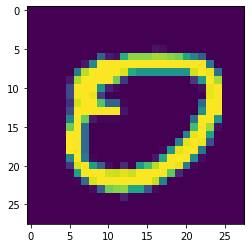

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

Y = y_train
X = x_train

test = x_test

X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
print("Size of Dataset: " , len(X))

cross_validation_size = int(len(X)*0.05)
print("Size of Cross Validation Set: " , cross_validation_size)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = cross_validation_size, random_state=random_seed)

X_test = test
plt.imshow(X_train[0][:,:,0])

<b>Image Pre-Processing Steps:</b>

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels since in the paper input images were 32x32

X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels

Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [ ]:
# By using the image generator, we are not generating new data. We are only replacing the exisiting images. 

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [ ]:
#history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

<b>Training the Model:</b>

In [ ]:
LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

Epoch 1/30
891/891 [==============================] - 17s 9ms/step - loss: 0.2171 - accuracy: 0.9436 - val_loss: 0.0740 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 2/30
891/891 [==============================] - 8s 8ms/step - loss: 0.0859 - accuracy: 0.9799 - val_loss: 0.0519 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 3/30
891/891 [==============================] - 7s 8ms/step - loss: 0.0659 - accuracy: 0.9847 - val_loss: 0.0424 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 4/30
891/891 [==============================] - 7s 8ms/step - loss: 0.0572 - accuracy: 0.9865 - val_loss: 0.0451 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/30
891/891 [==============================] - 7s 8ms/step - loss: 0.0516 - accuracy: 0.9871 - val_loss: 0.0639 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 6/30
891/891 [==============================] - 7s 8ms/step - loss: 0.0330 - accuracy: 0.9925 - val_loss: 0.0304 - val_accuracy: 0.9947 - lr: 2.0000e-04
Epoch 7/30
891/891 [==============================] - 7s 8ms/step

<Figure size 432x288 with 0 Axes>

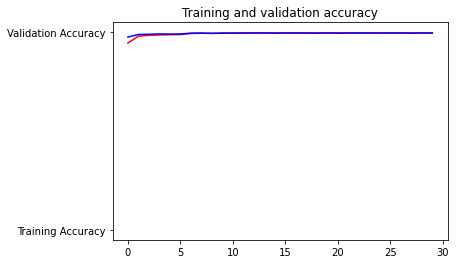

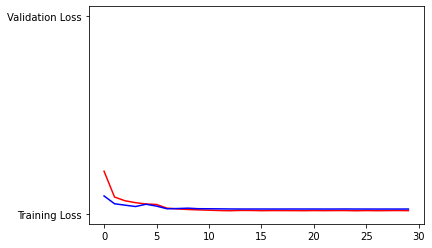

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

<b>Saving the trained model to Google Drive:</b> \
We don't want our model to run on anvil. Our code on Google Collab serves as the backend and we wish that the training and prediction of the model occurs here itself. The anvil webpage is just meant to serve as a tool to use the model at the backend in a user-friendly fashion. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
LeNet5Model.save('model01')

<b>Loading the Saved Model & just testing it around:</b>

In [ ]:
model = tf.keras.models.load_model('/content/model01')

In [ ]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[6.4723054e-08, 8.8056220e-07, 5.5330293e-07, ..., 9.9999416e-01,
        2.9794004e-08, 2.8615477e-06],
       [9.4641806e-08, 5.9463318e-06, 9.9998832e-01, ..., 5.6362472e-07,
        4.2333238e-07, 3.7168260e-07],
       [1.3393417e-07, 9.9999404e-01, 1.2596232e-06, ..., 2.3351106e-06,
        3.3310326e-07, 2.4445984e-07],
       ...,
       [3.4806529e-08, 1.7250204e-07, 1.8377462e-09, ..., 9.1992405e-08,
        7.7744198e-07, 1.4016234e-06],
       [6.9633309e-08, 2.6005976e-08, 1.4608998e-08, ..., 7.5380648e-08,
        6.4661281e-06, 4.4630582e-07],
       [4.7279441e-06, 3.3468289e-06, 1.4659629e-05, ..., 1.2261165e-07,
        1.1030751e-05, 1.5011559e-06]], dtype=float32)

In [ ]:
pred_probs2 = model.predict(X_test)
pred = np.argmax(pred_probs2, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
fa = np.array([[0]*28]*28)

fa = fa.reshape(-1,28,28,1)
fa = np.array(fa)
fa = np.pad(fa, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test = (X_test - mean_px)/(std_px)

def tf(arr):
    return model.predict([arr])
  
    pass

tf(fa)

1/1 [==============================] - 0s 194ms/step


array([[1.9986854e-01, 5.3302804e-04, 6.2807341e-04, 4.1419157e-04,
        3.0202964e-02, 7.8012858e-04, 1.1334107e-03, 4.2225185e-04,
        7.6531577e-01, 7.0157356e-04]], dtype=float32)

In [ ]:
np.argmax(tf(fa), axis=1)

1/1 [==============================] - 0s 16ms/step


array([8])

<b>Deploying the Model to Anvil:</b>

In [ ]:
pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=a902de8bcc79be534422628610ce63920adb1e5f3a1c9886335004196473c10b
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("server_2ZFMOGCN4XGVNPHZJEAZKEQU-27FWMJWBQ7YMXCNP")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER


In [ ]:
@anvil.server.callable
def test_func(fetch_array):
  
  #fetch_array = fetch_array.to_numpy()
  #fetch_array = tf.reshape(fetch_array,(1,28,28,1))
  fetch_array = np.array(fetch_array).reshape(-1,28,28,1)
  #fetch_array = np.array(fetch_array)
  fetch_array = np.pad(fetch_array, ((0,0),(2,2),(2,2),(0,0)), 'constant')

  # return_value = np.argmax(LeNet5Model.predict(np.expand_dims(np.expand_dims(fetch_array, axis=0), axis=3)), axis=1)[0]
  return_val = np.argmax(model.predict(fetch_array), axis = 1)
  return return_val

In [ ]:
anvil.server.wait_forever()

1/1 [==============================] - 0s 125ms/step


<b>The End.</b>